# Portfolio Allocation And Sharpe Ratio Calculation

In this Portfolio we have taken Data of 5 years from 2016-07-21 to 2021-07-20 of 4 Companies namely
* HDFC
* WIPRO
* Larsen & Toubro
* RELIANCE

In [1]:
#importing Libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data (Source - Yahoo Finance)

In [2]:
HDFC = pd.read_csv('HDFCBANK.NS (1).csv', index_col = 'Date' , parse_dates = True)
HDFC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,615.349976,619.950012,611.250000,614.299988,598.697205,4556452.0
2016-07-22,616.674988,617.325012,610.750000,615.400024,599.769287,2810136.0
2016-07-25,616.500000,624.724976,613.500000,623.474976,607.639160,4936442.0
2016-07-26,621.200012,622.825012,617.575012,619.400024,603.667725,2832996.0
2016-07-27,620.500000,623.775024,615.000000,618.474976,602.766113,5367368.0
...,...,...,...,...,...,...
2021-07-14,1497.500000,1507.349976,1491.099976,1499.150024,1499.150024,4894247.0
2021-07-15,1505.000000,1526.750000,1499.650024,1520.699951,1520.699951,5219401.0
2021-07-16,1527.949951,1529.949951,1518.800049,1522.349976,1522.349976,2585314.0


In [3]:
WIPRO= pd.read_csv('WIPRO.NS.csv' ,  index_col = 'Date' , parse_dates = True)
WIPRO

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,202.087555,204.300049,202.087555,203.250046,199.874084,3851740.0
2016-07-22,202.500046,202.875046,200.625046,201.656296,198.306778,3665012.0
2016-07-25,201.637543,203.887543,200.625046,203.568802,200.187546,1954271.0
2016-07-26,203.250046,206.531296,202.856293,204.787552,201.386032,4376102.0
2016-07-27,204.787552,207.281296,203.456299,205.931305,202.510773,3767543.0
...,...,...,...,...,...,...
2021-07-13,528.000000,529.500000,522.599976,524.849976,524.849976,4172358.0
2021-07-14,526.250000,563.299988,525.599976,561.700012,561.700012,29348083.0
2021-07-15,561.000000,579.650024,559.000000,575.900024,575.900024,31066201.0


In [4]:
LT = pd.read_csv('LT.NS.csv' ,  index_col = 'Date' , parse_dates = True)
LT

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,1050.000000,1050.000000,1034.666626,1038.366699,935.943176,1678212.0
2016-07-22,1040.066650,1051.933350,1035.033325,1049.333374,945.828064,1877206.0
2016-07-25,1048.000000,1059.199951,1042.000000,1057.266724,952.978882,2209774.0
2016-07-26,1059.000000,1065.333374,1054.066650,1061.800049,957.065002,1729183.0
2016-07-27,1064.199951,1076.666626,1057.766724,1068.099976,962.743408,2467012.0
...,...,...,...,...,...,...
2021-07-14,1513.550049,1549.900024,1508.000000,1544.699951,1544.699951,4010254.0
2021-07-15,1550.000000,1625.000000,1549.949951,1609.349976,1609.349976,9066480.0
2021-07-16,1609.349976,1622.800049,1595.099976,1618.750000,1618.750000,4157388.0


In [5]:
RELIANCE = pd.read_csv('RELIANCE.NS.csv' ,  index_col = 'Date' , parse_dates = True)
RELIANCE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,507.192322,507.687622,497.781525,498.450195,485.688568,3097170.0
2016-07-22,498.276825,504.121429,497.831055,502.660278,489.790863,3184126.0
2016-07-25,502.239258,507.068512,498.945496,506.573181,493.603546,3803482.0
2016-07-26,506.697021,512.541626,502.833649,507.217102,494.231049,4853316.0
2016-07-27,506.721771,508.182922,499.737976,501.793488,488.946259,5090697.0
...,...,...,...,...,...,...
2021-07-14,2100.350098,2106.850098,2081.250000,2086.000000,2086.000000,3937768.0
2021-07-15,2095.000000,2095.000000,2078.500000,2082.350098,2082.350098,4360415.0
2021-07-16,2087.750000,2114.750000,2087.600098,2112.399902,2112.399902,4074206.0


In [6]:
#Dropping Of last (extra Column)
LT.drop(LT.tail(1).index,inplace=True)
RELIANCE.drop(RELIANCE.tail(1).index,inplace=True)
HDFC.drop(HDFC.tail(1).index,inplace=True)
HDFC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,615.349976,619.950012,611.250000,614.299988,598.697205,4556452.0
2016-07-22,616.674988,617.325012,610.750000,615.400024,599.769287,2810136.0
2016-07-25,616.500000,624.724976,613.500000,623.474976,607.639160,4936442.0
2016-07-26,621.200012,622.825012,617.575012,619.400024,603.667725,2832996.0
2016-07-27,620.500000,623.775024,615.000000,618.474976,602.766113,5367368.0
...,...,...,...,...,...,...
2021-07-13,1496.099976,1506.099976,1484.099976,1501.849976,1501.849976,9089071.0
2021-07-14,1497.500000,1507.349976,1491.099976,1499.150024,1499.150024,4894247.0
2021-07-15,1505.000000,1526.750000,1499.650024,1520.699951,1520.699951,5219401.0


In [7]:
#dropping Of Missing Values if Any
HDFC.dropna(inplace = True)
WIPRO.dropna(inplace = True)
LT.dropna(inplace = True)
RELIANCE.dropna(inplace = True)

# Normalize Prices

In [8]:
# calculating Normalized Return Value
for stock_df in (HDFC , RELIANCE , LT , WIPRO):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']
    
HDFC.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2016-07-21,615.349976,619.950012,611.250000,614.299988,598.697205,4556452.0,1.000000
2016-07-22,616.674988,617.325012,610.750000,615.400024,599.769287,2810136.0,1.001791
2016-07-25,616.500000,624.724976,613.500000,623.474976,607.639160,4936442.0,1.014936
2016-07-26,621.200012,622.825012,617.575012,619.400024,603.667725,2832996.0,1.008302
2016-07-27,620.500000,623.775024,615.000000,618.474976,602.766113,5367368.0,1.006796


# Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in WIPRO
* 20% in HDFC
* 40% in Reliance
* 10% in LT

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [9]:
for stock_df , allo in zip((HDFC , RELIANCE , LT , WIPRO) , [0.2 , 0.4 , 0.1 , 0.3]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [10]:
HDFC.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation
Date,,,,,,,,
2016-07-21,615.349976,619.950012,611.250000,614.299988,598.697205,4556452.0,1.000000,0.200000
2016-07-22,616.674988,617.325012,610.750000,615.400024,599.769287,2810136.0,1.001791,0.200358
2016-07-25,616.500000,624.724976,613.500000,623.474976,607.639160,4936442.0,1.014936,0.202987
2016-07-26,621.200012,622.825012,617.575012,619.400024,603.667725,2832996.0,1.008302,0.201660
2016-07-27,620.500000,623.775024,615.000000,618.474976,602.766113,5367368.0,1.006796,0.201359


# Invesment

Let's pretend we invested a 1 lakh rupees in this portfolio

In [11]:
for stock_df in ((HDFC , RELIANCE , LT , WIPRO)):
    stock_df['Position Values'] = stock_df['Allocation']*100000

# Total Portfolio Value

In [12]:
list1 = [HDFC['Position Values'] , RELIANCE['Position Values'] , LT['Position Values'] , WIPRO['Position Values']]
portfolio_val = pd.concat(list1 , axis = 1)

In [13]:
portfolio_val.columns = ['HDFC', 'RELIANCE' , 'LT' , 'WIPRO']

In [14]:
portfolio_val.head()

,HDFC,RELIANCE,LT,WIPRO
Date,,,,
2016-07-21,20000.000000,40000.000000,10000.000000,30000.000000
2016-07-22,20035.813830,40337.853948,10105.614190,29764.755995
2016-07-25,20298.713771,40651.856232,10182.016456,30047.048921
2016-07-26,20166.044537,40703.535686,10225.674235,30226.935074
2016-07-27,20135.925405,40268.294641,10286.344649,30395.752508


In [15]:
portfolio_val['Total Value'] = portfolio_val.sum(axis = 1)

In [16]:
portfolio_val

,HDFC,RELIANCE,LT,WIPRO,Total Value
Date,,,,,
2016-07-21,20000.000000,40000.000000,10000.000000,30000.000000,100000.000000
2016-07-22,20035.813830,40337.853948,10105.614190,29764.755995,100244.037962
2016-07-25,20298.713771,40651.856232,10182.016456,30047.048921,101179.635381
2016-07-26,20166.044537,40703.535686,10225.674235,30226.935074,101322.189531
2016-07-27,20135.925405,40268.294641,10286.344649,30395.752508,101086.317203
...,...,...,...,...,...
2021-07-13,50170.602550,172925.622659,16171.921702,78777.092882,318045.239794
2021-07-14,50080.408309,171797.331660,16504.206565,84308.080481,322690.027015
2021-07-15,50800.302333,171496.735579,17194.953895,86439.424133,325931.415940


Final Total Value Of our portfolio After 5 years is 325325.732281

# Plotting Total Portfolio Value

<AxesSubplot:xlabel='Date'>

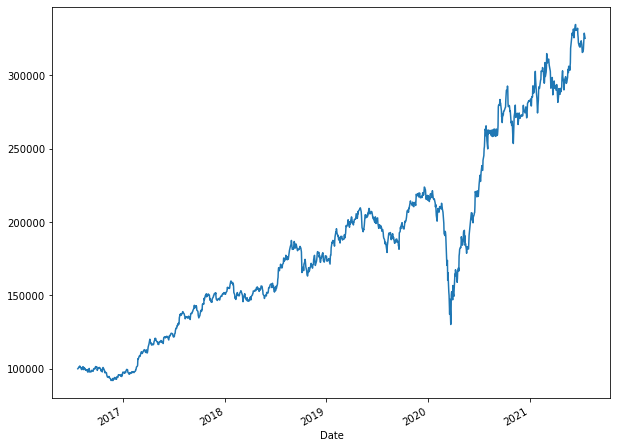

In [17]:
plt.figure(figsize =(10,8))
portfolio_val['Total Value'].plot()

<AxesSubplot:xlabel='Date'>

<Figure size 1800x1200 with 0 Axes>

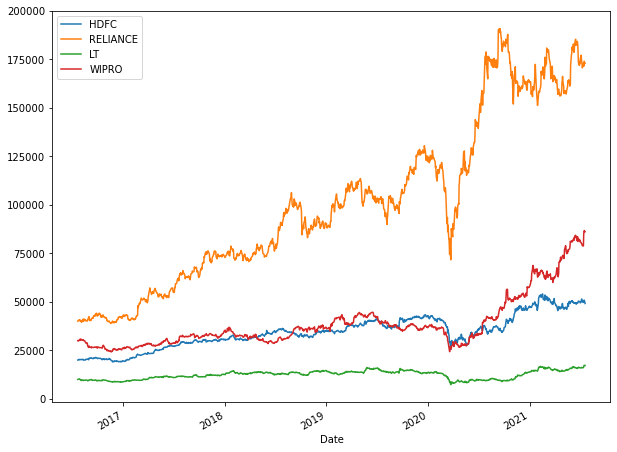

In [18]:
#visualizing Individual plots of the companies
plt.figure(figsize =(12,8) , dpi = 150)
portfolio_val.drop('Total Value' , axis = 1).plot(figsize = (10,8))

# Portfolio Statistics

In [19]:
# daily returns
portfolio_val['Daily Return'] = portfolio_val['Total Value'].pct_change(1)

In [20]:
portfolio_val.head()

,HDFC,RELIANCE,LT,WIPRO,Total Value,Daily Return
Date,,,,,,
2016-07-21,20000.000000,40000.000000,10000.000000,30000.000000,100000.000000,NaN
2016-07-22,20035.813830,40337.853948,10105.614190,29764.755995,100244.037962,0.002440
2016-07-25,20298.713771,40651.856232,10182.016456,30047.048921,101179.635381,0.009333
2016-07-26,20166.044537,40703.535686,10225.674235,30226.935074,101322.189531,0.001409
2016-07-27,20135.925405,40268.294641,10286.344649,30395.752508,101086.317203,-0.002328


In [21]:
#Cumulative Return
cum_ret = 100 * (portfolio_val['Total Value'][-1]/portfolio_val['Total Value'][0] -1 )
print('Our return was {} percent!'.format(cum_ret))

Our return was 225.3257322814114 percent!


In [22]:
# Avg daily Return
portfolio_val['Daily Return'].mean()

0.0010569347741985217

In [23]:
#std daily return 
portfolio_val['Daily Return'].std()

0.013958301213346264

<AxesSubplot:ylabel='Density'>

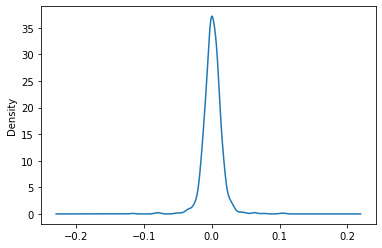

In [24]:
portfolio_val['Daily Return'].plot(kind='kde')

# Calculating Sharpe Ratio


In [25]:
#For Yearly Data
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.07572087448492164

# Sharpe Ratio
* sharpe Ratio Above 1 is Acceptable
* sharpe Ratio Above 2 is Great
* sharpe Ratio Above 3 excellent

In [26]:
# for Daily Data
(252**0.5)*SR


1.2020316176606325

Our Sharpe Ratio Came out to be 1.202
